<a href="https://colab.research.google.com/github/bellasoniadwi/PCVK_Genap_2023/blob/main/UAS_Anjani_Bella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UAS PCVK TI-3E

Judul: Evaluasi Performa Hyperparameter Tuning CNN Untuk Pengenalan Ekspresi Wajah Menggunakan Dataset CKPLUS

Anggota:
1. Anjani Dwilestari        2041720180/03
2. Bella Sonia Dwi Angelina 2041720063/04

LANGKAH 1 - SETUP

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.0 MB/s eta 0:00:00


In [ ]:
#akses drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

LANGKAH 2 - PERSIAPAN DATASET

Load Data

In [ ]:
import os
print(os.listdir("/content/drive/MyDrive/PCVK_AB/input/ck/"))

x = []
y = []
datadir = '/content/drive/MyDrive/PCVK_AB/CK+48'
Categories = []
for file_label in os.listdir(datadir):
    Categories.append(file_label)
    for file_name in os.listdir(datadir+'/'+file_label):
        x.append(datadir+'/'+file_label+'/'+file_name)
        y.append(file_label)

['CK+48', 'models', '.ipynb_checkpoints']


Split Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.30,random_state=34)

In [ ]:
print("x_train = ",len(x_train))
print("x_test = ",len(x_test))

x_train =  686
x_test =  295


In [ ]:
# os.mkdir('/content/drive/MyDrive/PCVK_AB/CK+48_Working/train_07')
# os.mkdir('/content/drive/MyDrive/PCVK_AB/CK+48_Working/test_03')

In [ ]:
# import shutil

# for file_label in Categories:
#     os.mkdir('/content/drive/MyDrive/PCVK_AB/CK+48_Working/test_03/'+file_label)
#     new='/content/drive/MyDrive/PCVK_AB/CK+48_Working/test_03/'+file_label
#     for file_name in x_test :
#         if(file_name.find(file_label))>0:
#             shutil.copy2(file_name, new)

In [ ]:
# import shutil

# for file_label in Categories:
#     os.mkdir('/content/drive/MyDrive/PCVK_AB/CK+48_Working/train_07/'+file_label)
#     new='/content/drive/MyDrive/PCVK_AB/CK+48_Working/train_07/'+file_label
#     for file_name in x_train :
#         if(file_name.find(file_label))>0:
#             shutil.copy2(file_name, new)

Augmentation & Normalization Data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

Resize_pixelsize = 48
BS = 7

def get_datagen(dataset, aug=False):
    if aug:
        datagen = ImageDataGenerator(
                            rescale=1./255,
                            featurewise_center=False,
                            featurewise_std_normalization=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True)
    else:
        datagen = ImageDataGenerator(rescale=1./255)

    return datagen.flow_from_directory(
            dataset,
            target_size=(Resize_pixelsize,Resize_pixelsize),
            color_mode='rgb',
            shuffle = True,
            class_mode='categorical',
            batch_size=BS)

In [ ]:
train_generator  = get_datagen('/content/drive/MyDrive/PCVK_AB/CK+48_Working/train_07')
dev_generator  = get_datagen('/content/drive/MyDrive/PCVK_AB/CK+48_Working/test_03')

Found 686 images belonging to 7 classes.
Found 295 images belonging to 7 classes.


In [ ]:
label = train_generator.class_indices.keys()
print(label)

dict_keys(['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise'])


LANGKAH 3 - DEFINE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.losses import categorical_crossentropy

input_shape=(48,48,3)

model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
history = model.fit_generator(
    generator = train_generator,
    validation_data=dev_generator,
    steps_per_epoch=686// BS,
    validation_steps=295 // BS,
    shuffle=True,
    epochs=50,
    callbacks=[stop_early],
    use_multiprocessing=True,
)

<ipython-input-15-9f76d8c1beea>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
98/98 [==============================] - 202s 2s/step - loss: 1.8289 - accuracy: 0.2959 - val_loss: 1.4709 - val_accuracy: 0.4864
Epoch 2/50
98/98 [==============================] - 7s 74ms/step - loss: 1.2464 - accuracy: 0.5758 - val_loss: 0.8798 - val_accuracy: 0.6769
Epoch 3/50
98/98 [==============================] - 12s 127ms/step - loss: 0.7421 - accuracy: 0.7274 - val_loss: 0.5627 - val_accuracy: 0.7993
Epoch 4/50
98/98 [==============================] - 7s 72ms/step - loss: 0.5616 - accuracy: 0.8047 - val_loss: 0.3468 - val_accuracy: 0.8912
Epoch 5/50
98/98 [==============================] - 11s 107ms/step - loss: 0.4092 - accuracy: 0.8513 - val_loss: 0.3330 - val_accuracy: 0.8912
Epoch 6/50
98/98 [==============================] - 10s 100ms/step - loss: 0.2914 - accuracy: 0.9009 - val_loss: 0.2618 - val_accuracy: 0.9150
Epoch 7/50
98/98 [==============================] - 5s 50ms/step - loss: 0.2557 - accuracy: 0.9155 - val_loss: 0.1700 - val_accuracy: 0.9456
Epoch 8

In [ ]:
print('\n# Evaluate on test data')
results_test = model.evaluate_generator(dev_generator, 295 // BS)
print('test loss, test acc:', results_test)


# Evaluate on test data


<ipython-input-16-5ecf48415125>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results_test = model.evaluate_generator(dev_generator, 295 // BS)


test loss, test acc: [0.17053912580013275, 0.976190447807312]


Prediksi menggunakan data test

In [ ]:
Y_pred = model.predict_generator(dev_generator,295 // BS+1)
y_pred = np.argmax(Y_pred, axis=1)

<ipython-input-17-6cd9adf94130>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(dev_generator,295 // BS+1)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(dev_generator.classes, y_pred)
print(confusion_matrix(dev_generator.classes, y_pred))
print('Classification Report')
target_names = ['1','2','3','4','5','6','7']
print(classification_report(dev_generator.classes, y_pred, target_names=target_names))

[[ 7  3  7  2  5  6  6]
 [ 2  1  1  0  5  2  7]
 [ 4  4 10  3  7  1 18]
 [ 2  1  3  4  7  2  7]
 [ 3  3  8  7 13  4 19]
 [ 5  2  4  2  4  0  6]
 [ 9  4 16  8 16  7 28]]
Classification Report
              precision    recall  f1-score   support

           1       0.22      0.19      0.21        36
           2       0.06      0.06      0.06        18
           3       0.20      0.21      0.21        47
           4       0.15      0.15      0.15        26
           5       0.23      0.23      0.23        57
           6       0.00      0.00      0.00        23
           7       0.31      0.32      0.31        88

    accuracy                           0.21       295
   macro avg       0.17      0.17      0.17       295
weighted avg       0.21      0.21      0.21       295



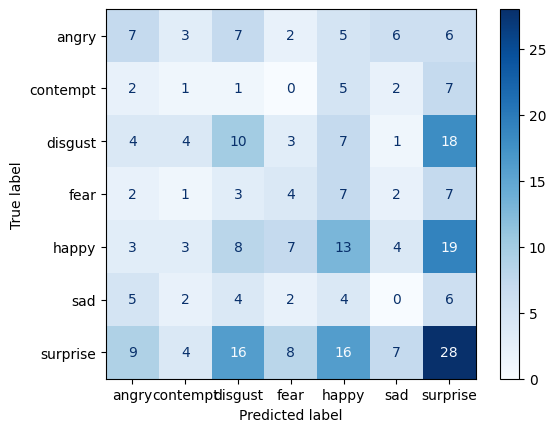

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

labels=['angry','contempt','disgust','fear','happy','sad','surprise',]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

LANGKAH 4 - Instansiasi Tuner dan Lakukan Hypertuning

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.losses import categorical_crossentropy

input_shape=(48,48,3)

class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        # model.add(Conv2D(64, (3, 3), activation = 'relu'))
        # model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())

        model.add(Dense(128, activation = 'relu'))
        model.add(Dropout(0.5))
        model.add(Dense(7, activation = 'softmax'))


        # Tune the learning rate for the optimizer
        # Choose an optimal value from 0.01, 0.001, or 0.0001
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss='categorical_crossentropy',
            metrics=['accuracy'],
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice("batch_size", [2, 7, 16, 32]),
            **kwargs,
        )

In [ ]:
tuner = kt.Hyperband(
    MyHyperModel(),
    objective="val_accuracy",
    overwrite=True,
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt',
)

Buat callback untuk menghentikan training lebih awal setelah mencapai nilai tertentu untuk validation loss.

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

Tuner search

In [ ]:
tuner.search(train_generator, epochs=50, validation_data=dev_generator, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal learning rate for the optimizer
is {best_hps.get('learning_rate')} and The optimal batch size for the optimizer is {best_hps.get('batch_size')}
""")

Trial 18 Complete [00h 00m 43s]
val_accuracy: 0.9661017060279846

Best val_accuracy So Far: 0.9661017060279846
Total elapsed time: 00h 05m 40s

The hyperparameter search is complete. The optimal learning rate for the optimizer
is 0.001 and The optimal batch size for the optimizer is 7



LANGKAH 5 - TRAIN MODEL

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)

history = model.fit(train_generator, epochs=50, validation_data=dev_generator)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
98/98 [==============================] - 6s 50ms/step - loss: 1.8069 - accuracy: 0.3076 - val_loss: 1.5554 - val_accuracy: 0.4949
Epoch 2/50
98/98 [==============================] - 7s 67ms/step - loss: 1.2334 - accuracy: 0.5816 - val_loss: 0.8660 - val_accuracy: 0.6746
Epoch 3/50
98/98 [==============================] - 5s 46ms/step - loss: 0.7804 - accuracy: 0.7172 - val_loss: 0.5630 - val_accuracy: 0.7864
Epoch 4/50
98/98 [==============================] - 6s 65ms/step - loss: 0.5587 - accuracy: 0.7945 - val_loss: 0.4698 - val_accuracy: 0.8102
Epoch 5/50
98/98 [==============================] - 4s 42ms/step - loss: 0.4836 - accuracy: 0.8294 - val_loss: 0.3327 - val_accuracy: 0.8949
Epoch 6/50
98/98 [==============================] - 5s 47ms/step - loss: 0.3884 - accuracy: 0.8542 - val_loss: 0.3543 - val_accuracy: 0.8678
Epoch 7/50
98/98 [==============================] - 7s 70ms/step - loss: 0.3696 - accuracy: 0.8717 - val_loss: 0.2712 - val_accuracy: 0.9254
Epoch 8/50
98

Instansiasi ulang hypermodel dan latih dengan jumlah epoch optimal dari atas

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_generator, epochs=best_epoch, validation_data=dev_generator)

Epoch 1/46
98/98 [==============================] - 6s 49ms/step - loss: 1.7947 - accuracy: 0.3149 - val_loss: 1.4619 - val_accuracy: 0.5797
Epoch 2/46
98/98 [==============================] - 7s 72ms/step - loss: 1.2891 - accuracy: 0.5641 - val_loss: 0.8909 - val_accuracy: 0.6508
Epoch 3/46
98/98 [==============================] - 5s 47ms/step - loss: 0.8483 - accuracy: 0.6968 - val_loss: 0.5985 - val_accuracy: 0.8000
Epoch 4/46
98/98 [==============================] - 7s 70ms/step - loss: 0.6318 - accuracy: 0.7682 - val_loss: 0.4539 - val_accuracy: 0.8644
Epoch 5/46
98/98 [==============================] - 5s 46ms/step - loss: 0.4725 - accuracy: 0.8367 - val_loss: 0.3703 - val_accuracy: 0.8814
Epoch 6/46
98/98 [==============================] - 6s 63ms/step - loss: 0.4073 - accuracy: 0.8586 - val_loss: 0.3457 - val_accuracy: 0.8780
Epoch 7/46
98/98 [==============================] - 4s 43ms/step - loss: 0.3253 - accuracy: 0.8921 - val_loss: 0.3273 - val_accuracy: 0.8780
Epoch 8/46
98

Evaluasi hypermodel dengan data test

In [ ]:
eval_result = hypermodel.evaluate(dev_generator)
print("[test loss, test accuracy]:", eval_result)

43/43 [==============================] - 1s 21ms/step - loss: 0.0157 - accuracy: 0.9898
[test loss, test accuracy]: [0.01569581776857376, 0.989830493927002]


Prediksi menggunakan data test

In [ ]:
Y_pred = model.predict_generator(dev_generator,295 // BS+1)
y_pred = np.argmax(Y_pred, axis=1)

<ipython-input-65-6cd9adf94130>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(dev_generator,295 // BS+1)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(dev_generator.classes, y_pred)
print(confusion_matrix(dev_generator.classes, y_pred))
print('Classification Report')
target_names = ['1','2','3','4','5','6','7']
print(classification_report(dev_generator.classes, y_pred, target_names=target_names))

[[ 4  0  6  1  9  3 13]
 [ 2  2  4  1  3  3  3]
 [ 5  2 12  2 11  4 11]
 [ 1  4  4  4  4  3  6]
 [ 9  4 10  4 12  6 12]
 [ 1  2  3  3  5  1  8]
 [ 8  4 10 11 13  5 37]]
Classification Report
              precision    recall  f1-score   support

           1       0.13      0.11      0.12        36
           2       0.11      0.11      0.11        18
           3       0.24      0.26      0.25        47
           4       0.15      0.15      0.15        26
           5       0.21      0.21      0.21        57
           6       0.04      0.04      0.04        23
           7       0.41      0.42      0.42        88

    accuracy                           0.24       295
   macro avg       0.19      0.19      0.19       295
weighted avg       0.24      0.24      0.24       295



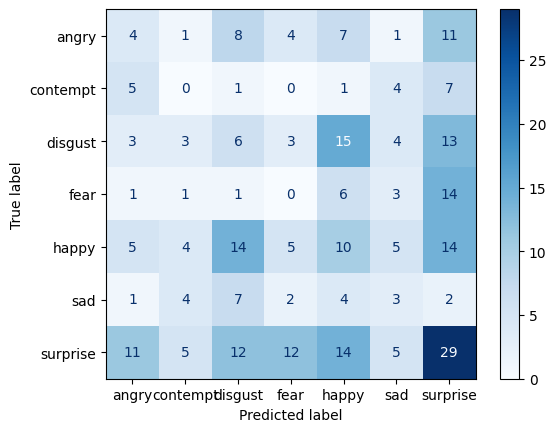

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

labels=['angry','contempt','disgust','fear','happy','sad','surprise',]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

LANGKAH 6 - MEMPERSIAPKAN MODEL UNTUK PREDIKSI

Menyimpan Model

In [ ]:
batch_size_str = '-BS_' + str(best_hps.get('batch_size'))
learning_rate_str = '-LR_' + str(best_hps.get('learning_rate'))
epoch_str = '-EPOCHS_' + str(best_epoch)
test_acc = 'test_acc_%.3f' % eval_result[1]
model.save('/content/drive/MyDrive/PCVK_AB/CK+48_Working/models/' + 'Sequential' + epoch_str + batch_size_str + learning_rate_str + test_acc + '.h5')

Load Model

In [ ]:
# Loading the best fit model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/PCVK_AB/CK+48_Working/models/Sequential-EPOCHS_46-BS_7-LR_0.001test_acc_0.990.h5')

In [ ]:
# just to map o/p values
op = dict(zip( train_generator.class_indices.values(), train_generator.class_indices.keys()))

1/1 [==============================] - 0s 149ms/step
 the image is of fear


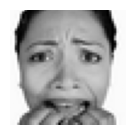

In [ ]:
# path for the image to see if it predics correct class
from keras.utils import img_to_array, load_img

path = "/content/drive/MyDrive/PCVK_AB/Emotion Detection/test/fearful/im139.png"
img = load_img(path, target_size=(48,48) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# Buat plot dengan ukuran 150x150 piksel
plt.figure(figsize=(1.5, 1.5), dpi=100)  # ukuran figur dalam inches (1 inch = 100 piksel)

# Tampilkan gambar dengan ukuran 150x150 piksel
plt.imshow(input_arr[0], extent=[0, 150, 0, 150])

# Hapus sumbu
plt.axis('off')

# Tampilkan plot
plt.show()

Test menggunakan foto penulis

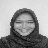

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

bit_depth=8
level = 255 / (pow(2,bit_depth)-1)

original2 = cv.imread('/content/drive/MyDrive/PCVK_AB/anjani(1).jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original2.shape, original2.dtype)

# Akses gambar tiap pixel
for y in range(original2.shape[0]):
  depth_image[y] = np.clip(np.round(original2[y]/level)*level, 0, 255)

img4 = cv.resize(depth_image,(48,48))
# final_frame = cv.hconcat((original2, depth_image))
cv2_imshow(img4)

1/1 [==============================] - 0s 34ms/step
 the image is of happy


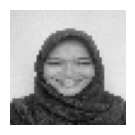

In [ ]:
# path for the image to see if it predics correct class
from keras.utils import img_to_array, load_img

path = "/content/drive/MyDrive/PCVK_AB/test_anjani(1).png"
img = load_img(path, target_size=(48,48) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# Buat plot dengan ukuran 150x150 piksel
plt.figure(figsize=(1.5, 1.5), dpi=100)  # ukuran figur dalam inches (1 inch = 100 piksel)

# Tampilkan gambar dengan ukuran 150x150 piksel
plt.imshow(input_arr[0], extent=[0, 150, 0, 150])

# Hapus sumbu
plt.axis('off')

# Tampilkan plot
plt.show()

1/1 [==============================] - 0s 26ms/step
 the image is of surprise


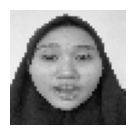

In [ ]:
# path for the image to see if it predics correct class
from keras.utils import img_to_array, load_img

path = "/content/drive/MyDrive/PCVK_AB/test_bella.png"
img = load_img(path, target_size=(48,48) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# Buat plot dengan ukuran 150x150 piksel
plt.figure(figsize=(1.5, 1.5), dpi=100)  # ukuran figur dalam inches (1 inch = 100 piksel)

# Tampilkan gambar dengan ukuran 150x150 piksel
plt.imshow(input_arr[0], extent=[0, 150, 0, 150])

# Hapus sumbu
plt.axis('off')

# Tampilkan plot
plt.show()